# Sequential Model

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
LOG_FILE = '../log/seq.csv'

df = pd.read_csv(LOG_FILE)
df['phase'] = df.replace({'phase': {0: 'train', 1: 'val'}})['phase']
df.head(n=10)

,epoch,batch,batch_time(s),phase
0,0,0,37.927835,train
1,0,1,37.692268,train
2,0,2,37.121747,train
3,0,3,36.992582,train
4,0,4,36.978777,train
5,0,5,37.005965,train
6,0,6,36.982660,train
7,0,7,37.064564,train
8,0,8,37.602187,train
9,0,9,37.391119,train


In [3]:
df.groupby('phase')['batch_time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
phase,,,,,,,,
train,100.0,37.444571,0.311581,36.978777,37.333533,37.418802,37.535844,39.849170
val,20.0,13.561432,0.042350,13.469661,13.538200,13.561505,13.601222,13.622708


In [4]:
df.groupby('epoch')['batch_time(s)'].sum().describe()

count       2.000000
mean     2007.842853
std         4.639145
min      2004.562482
25%      2006.202667
50%      2007.842853
75%      2009.483038
max      2011.123224
Name: batch_time(s), dtype: float64

# Pipeline Model

## 2-Stages

### 10 Microbatches

In [5]:
LOG_FILE = '../log/pipe_0_micro10_stage2.csv'

df = pd.read_csv(LOG_FILE)
df['phase'] = df.replace({'phase': {0: 'train', 1: 'val'}})['phase']

In [ ]:
df.groupby('phase')['batch_time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
phase,,,,,,,,
train,100.0,25.686979,1.026166,19.591154,25.407748,25.818709,26.197956,27.059549
val,20.0,8.189267,1.757590,7.531962,7.565194,7.643546,7.691071,13.870680


In [7]:
df.groupby('epoch')['batch_time(s)'].sum().describe()

count       2.000000
mean     1366.241614
std         6.544388
min      1361.614033
25%      1363.927823
50%      1366.241614
75%      1368.555404
max      1370.869195
Name: batch_time(s), dtype: float64

### 5 Microbatches

In [8]:
LOG_FILE = '../log/pipe_0_micro5_stage2.csv'

df = pd.read_csv(LOG_FILE)
df['phase'] = df.replace({'phase': {0: 'train', 1: 'val'}})['phase']

In [9]:
df.groupby('phase')['batch_time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
phase,,,,,,,,
train,100.0,19.022151,0.099282,18.936286,18.982342,19.010414,19.042588,19.916269
val,20.0,7.245916,0.021765,7.206877,7.229005,7.242957,7.263358,7.281318


In [10]:
df.groupby('epoch')['batch_time(s)'].sum().describe()

count       2.000000
mean     1023.566705
std         1.262030
min      1022.674315
25%      1023.120510
50%      1023.566705
75%      1024.012900
max      1024.459095
Name: batch_time(s), dtype: float64

## 4-Stages

### 10 Microbatches

In [11]:
LOG_FILE = '../log/pipe_0_micro10_stage4.csv'

df = pd.read_csv(LOG_FILE)
df['phase'] = df.replace({'phase': {0: 'train', 1: 'val'}})['phase']

In [ ]:
df.groupby('phase')['batch_time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
phase,,,,,,,,
train,100.0,29.364054,0.171964,28.919555,29.225830,29.436897,29.476227,29.629242
val,20.0,11.081379,0.049586,11.017027,11.037483,11.079573,11.124048,11.163506


In [13]:
df.groupby('epoch')['batch_time(s)'].sum().describe()

count       2.000000
mean     1579.016484
std         6.662101
min      1574.305667
25%      1576.661075
50%      1579.016484
75%      1581.371892
max      1583.727301
Name: batch_time(s), dtype: float64

### 5 Microbatches

In [14]:
LOG_FILE = '../log/pipe_0_micro5_stage4.csv'

df = pd.read_csv(LOG_FILE)
df['phase'] = df.replace({'phase': {0: 'train', 1: 'val'}})['phase']

In [15]:
df.groupby('phase')['batch_time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
phase,,,,,,,,
train,100.0,28.128015,0.085489,27.998015,28.087667,28.114255,28.147949,28.572289
val,20.0,10.625925,0.032423,10.565432,10.602100,10.621649,10.651275,10.697415


In [ ]:
df.groupby('epoch')['batch_time(s)'].sum().describe()

count       2.000000
mean     1512.660016
std         0.405571
min      1512.373234
25%      1512.516625
50%      1512.660016
75%      1512.803407
max      1512.946799
Name: batch_time(s), dtype: float64

# Data Parallelism + Pipeline

### 5 Microbatches

In [17]:
LOG_FILE = '../log/datapipe_0_micro5.csv'

df = pd.read_csv(LOG_FILE)
df['phase'] = df.replace({'phase': {0: 'train', 1: 'val'}})['phase']

In [18]:
df.groupby('phase')['batch_time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
phase,,,,,,,,
train,100.0,19.188787,0.236941,18.891591,19.056655,19.174020,19.243303,20.772401
val,20.0,7.338146,0.131296,7.228426,7.263646,7.296045,7.313771,7.656916


In [19]:
df.groupby('epoch')['batch_time(s)'].sum().describe()

count      4.000000
mean     516.410408
std        1.627128
min      515.113935
25%      515.524216
50%      515.875669
75%      516.761860
max      518.776358
Name: batch_time(s), dtype: float64

## 10 Microbatches

In [20]:
LOG_FILE = '../log/datapipe_0_micro10.csv'

df = pd.read_csv(LOG_FILE)
df['phase'] = df.replace({'phase': {0: 'train', 1: 'val'}})['phase']

In [21]:
df.groupby('phase')['batch_time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
phase,,,,,,,,
train,100.0,25.699374,1.180296,19.900962,25.595063,25.914878,26.179133,26.850862
val,20.0,8.866640,2.563700,7.318862,7.443986,7.685454,7.964949,14.090809


In [22]:
df.groupby('epoch')['batch_time(s)'].sum().describe()

count      4.000000
mean     686.817548
std        2.687646
min      683.086005
25%      685.808034
50%      687.505006
75%      688.514520
max      689.174175
Name: batch_time(s), dtype: float64

# Loss Comparison

In [23]:
LOG_FILE = '../log/seq_loss.csv'

df = pd.read_csv(LOG_FILE)
df['phase'] = df.replace({'phase': {0: 'train', 1: 'val'}})['phase']
df.head(n=10)

,epoch,batch,batch_time(s),loss,phase
0,0,0,46.103050,324.154846,train
1,0,1,45.660517,368.425354,train
2,0,2,45.882351,155.077713,train
3,0,3,46.394768,165.071198,train
4,0,4,46.356560,197.648849,train
5,0,5,45.823810,137.893021,train
6,0,6,45.914207,120.055359,train
7,0,7,46.135514,125.341064,train
8,0,8,45.929768,113.099991,train
9,0,9,46.169983,90.994980,train


In [31]:
df.groupby('phase')['loss'].describe()

,count,mean,std,min,25%,50%,75%,max
phase,,,,,,,,
train,100.0,33.797058,59.517444,3.632801,5.716252,9.481909,35.452668,368.425354
val,20.0,5.118888,0.259919,4.343691,5.047601,5.175150,5.274741,5.454959


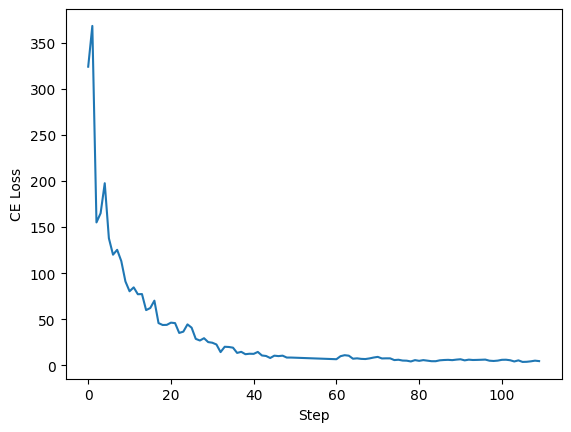

In [34]:
df[df['phase'] == 'train']['loss'].plot()
plt.xlabel('Step')
plt.ylabel('CE Loss')
plt.show()